VAIDEHI SHENDE

D1 - 24


PRACTICAL 6

Assigned:               
Bharti Infratel Ltd. TELECOM INFRATEL 24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
main_dataset1 = pd.read_csv(r"C:\Users\vaide\Downloads\archive (5)\BHARTIARTL.csv")

In [3]:
main_dataset1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


In [4]:
main_dataset1.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4.774000e+03,4.774000e+03,2456.000000,4.758000e+03,4758.000000
mean,379.688333,380.478456,387.034761,372.705216,379.798502,379.800765,379.824874,5.341070e+06,2.245218e+14,85133.370114,2.653730e+06,0.521711
std,207.237329,207.774041,212.037403,202.270599,207.163319,207.176886,206.953021,7.976471e+06,4.014405e+14,75136.125261,4.016530e+06,0.148377
min,0.000000,21.100000,21.600000,20.650000,20.700000,20.750000,20.960000,2.824600e+04,7.373966e+10,1392.000000,1.830100e+04,0.071900
25%,301.325000,302.000000,306.825000,296.575000,301.162500,301.400000,301.390000,1.838864e+06,5.580891e+13,43331.000000,8.125398e+05,0.417850
50%,348.800000,349.000000,353.925000,343.500000,348.575000,348.800000,348.750000,3.474614e+06,1.268449e+14,62231.500000,1.793994e+06,0.530000
75%,423.850000,425.000000,431.312500,417.250000,423.275000,423.937500,424.297500,5.922892e+06,2.382761e+14,97361.750000,3.254393e+06,0.628475
max,1125.650000,1133.900000,1184.200000,1090.250000,1131.350000,1125.650000,1113.580000,1.948880e+08,1.090756e+16,946705.000000,1.229199e+08,0.999800


In [5]:
null_values = main_dataset1.isnull().sum()
null_values

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2318
Deliverable Volume      16
%Deliverble             16
dtype: int64

In [6]:
main_dataset1 = main_dataset1.dropna()

In [7]:
null_values = main_dataset1.isnull().sum()
null_values

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
import numpy as np
import pandas as pd


# Check correlation with the target variable ('Close')
correlation = main_dataset1.corr()['Close'].abs().sort_values(ascending=False)
print("Correlation with 'Close':\n", correlation)

# Select the top 5 features with the highest correlation
selected_features = correlation.index[1:6]  # Excluding 'Close' itself
print("Selected Features:", selected_features)


Correlation with 'Close':
 Close                 1.000000
Last                  0.999842
VWAP                  0.999096
High                  0.997999
Low                   0.997318
Open                  0.994709
Prev Close            0.994118
Trades                0.540438
Turnover              0.527363
Volume                0.440803
Deliverable Volume    0.320002
%Deliverble           0.280156
Name: Close, dtype: float64
Selected Features: Index(['Last', 'VWAP', 'High', 'Low', 'Open'], dtype='object')


C:\Users\vaide\AppData\Local\Temp\ipykernel_1204\1178610493.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = main_dataset1.corr()['Close'].abs().sort_values(ascending=False)


In [12]:
main_dataset = main_dataset1.drop(columns=['Prev Close','Symbol', 'Series','Volume','Turnover','Trades','Deliverable Volume','%Deliverble'])
main_dataset

,Date,Open,High,Low,Last,Close,VWAP
2318,2011-06-01,375.25,384.65,375.00,381.75,381.60,381.07
2319,2011-06-02,379.00,385.90,378.50,381.05,381.15,382.61
2320,2011-06-03,382.00,384.60,377.15,379.30,378.45,381.20
2321,2011-06-06,380.35,382.60,375.50,380.05,380.00,380.05
2322,2011-06-07,379.00,381.85,377.00,378.45,377.85,379.53
...,...,...,...,...,...,...,...
4769,2021-04-26,522.75,528.50,522.75,527.20,527.55,526.12
4770,2021-04-27,527.45,538.55,526.25,535.50,534.30,534.45
4771,2021-04-28,535.95,548.00,535.60,543.75,544.30,542.82
4772,2021-04-29,549.70,550.00,539.10,540.20,540.85,542.81


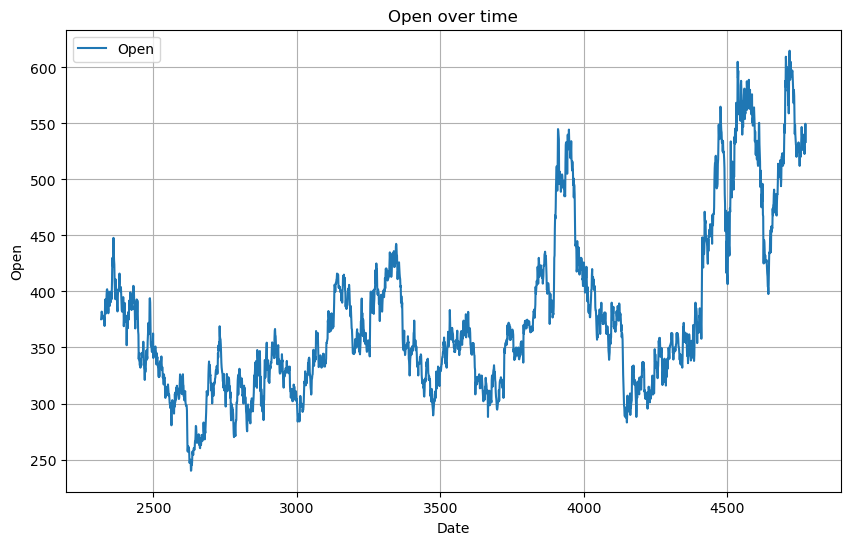

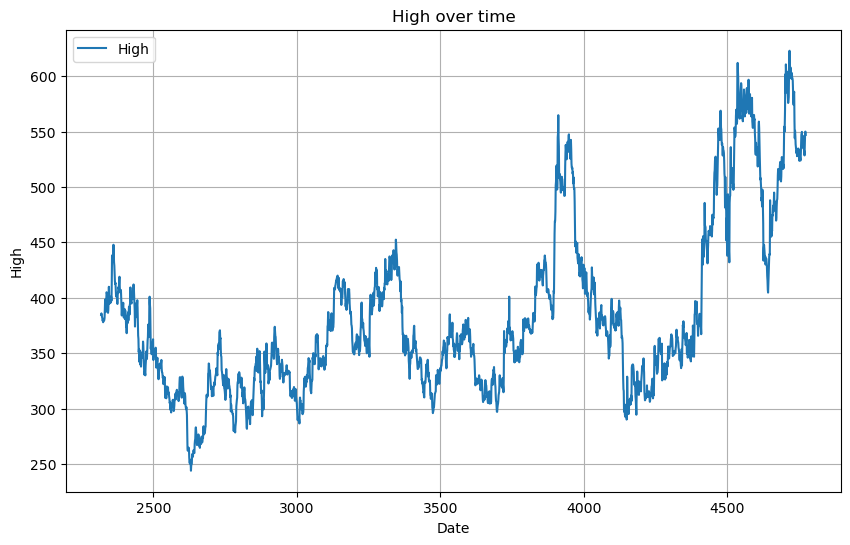

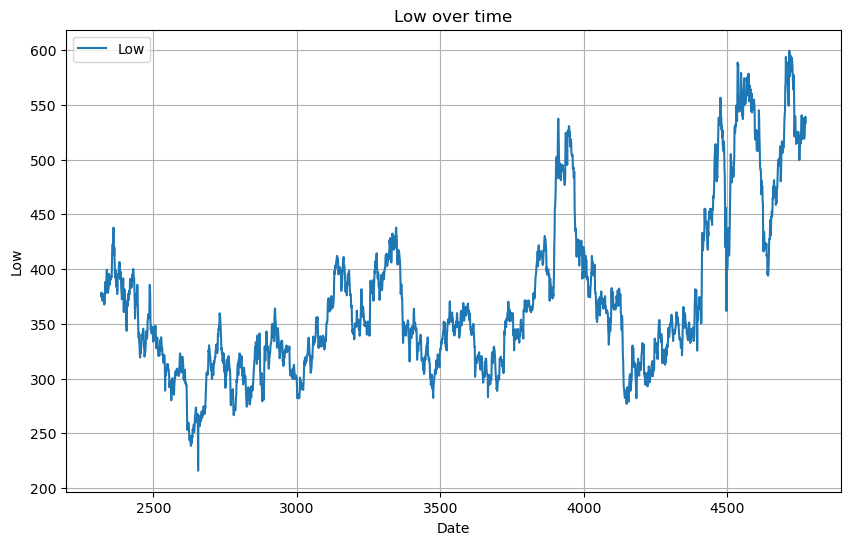

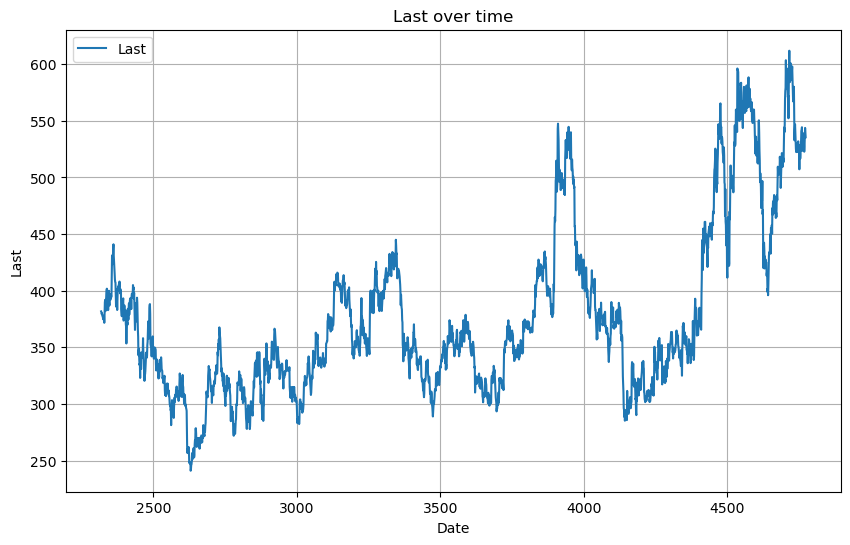

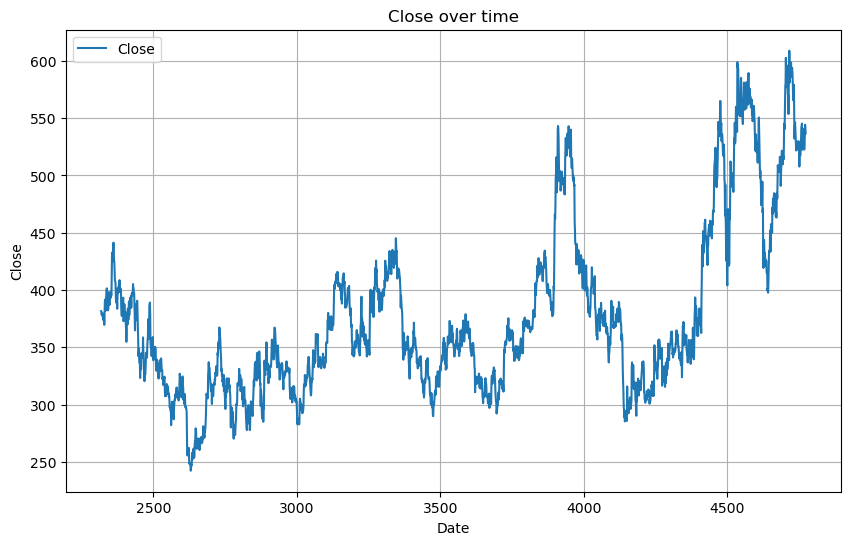

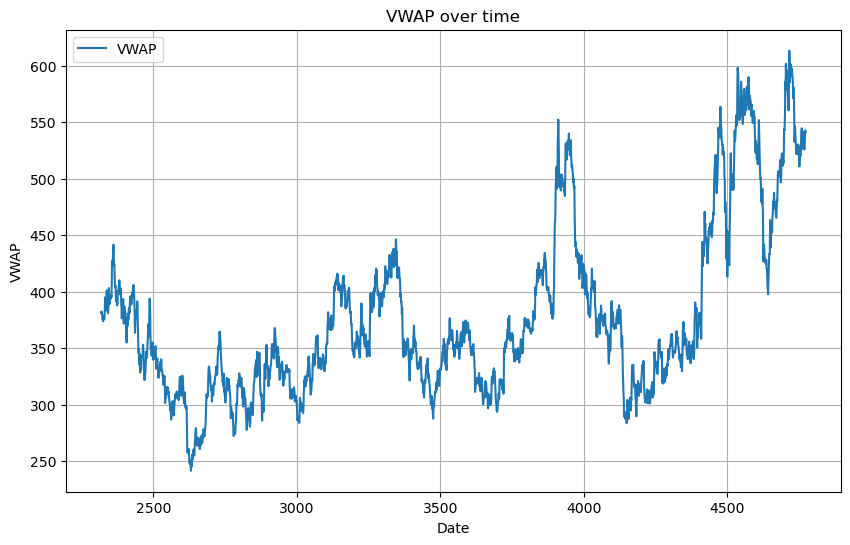

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'main_dataset' is your DataFrame with 'Date' as the index
# You may need to adjust the column names if they differ in your dataset
columns_to_plot = ['Open', 'High', 'Low', 'Last', 'Close', 'VWAP']

# Plotting each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(main_dataset.index, main_dataset[column], label=column)
    plt.title(f'{column} over time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


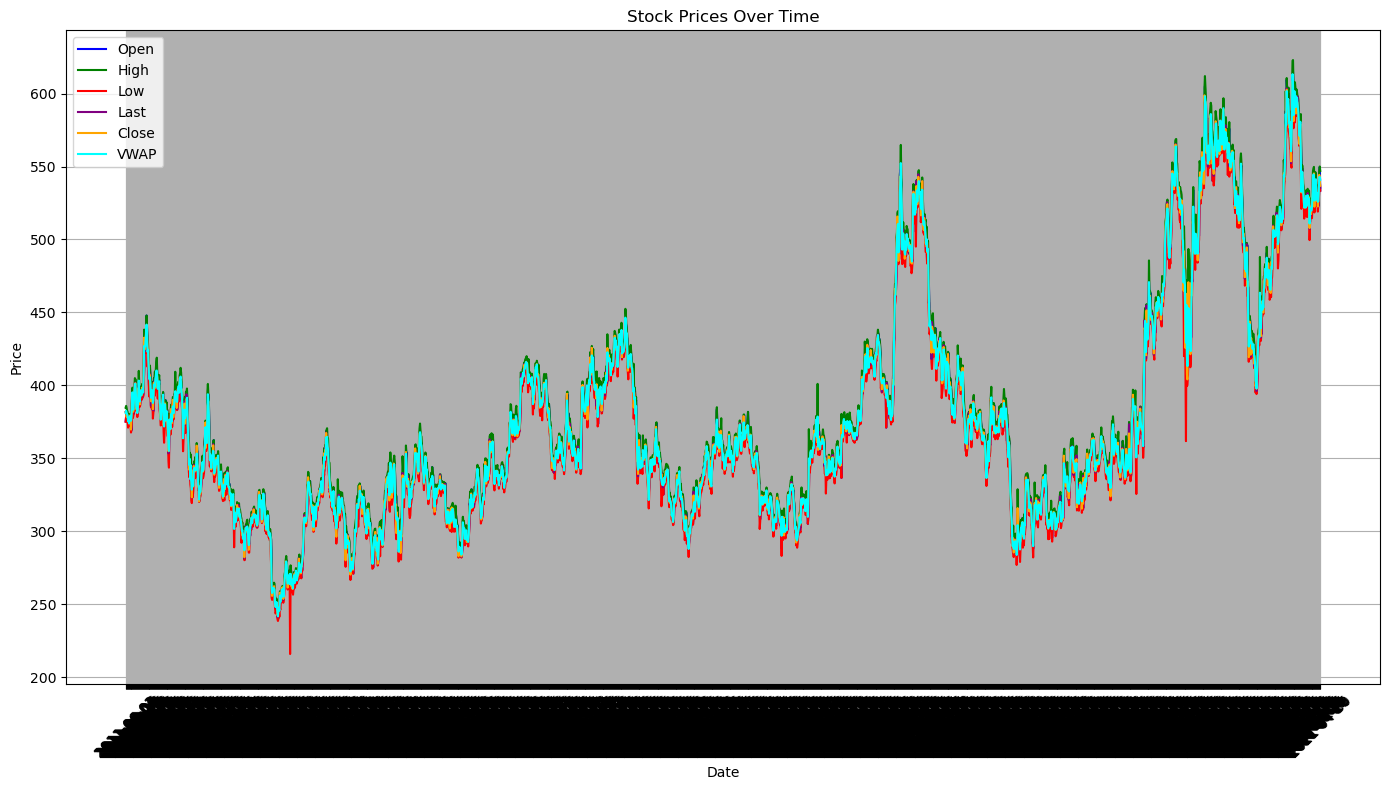

In [14]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(14, 8))

# Plot each feature
plt.plot(main_dataset['Date'], main_dataset['Open'], label='Open', color='blue')
plt.plot(main_dataset['Date'], main_dataset['High'], label='High', color='green')
plt.plot(main_dataset['Date'], main_dataset['Low'], label='Low', color='red')
plt.plot(main_dataset['Date'], main_dataset['Last'], label='Last', color='purple')
plt.plot(main_dataset['Date'], main_dataset['Close'], label='Close', color='orange')
plt.plot(main_dataset['Date'], main_dataset['VWAP'], label='VWAP', color='cyan')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


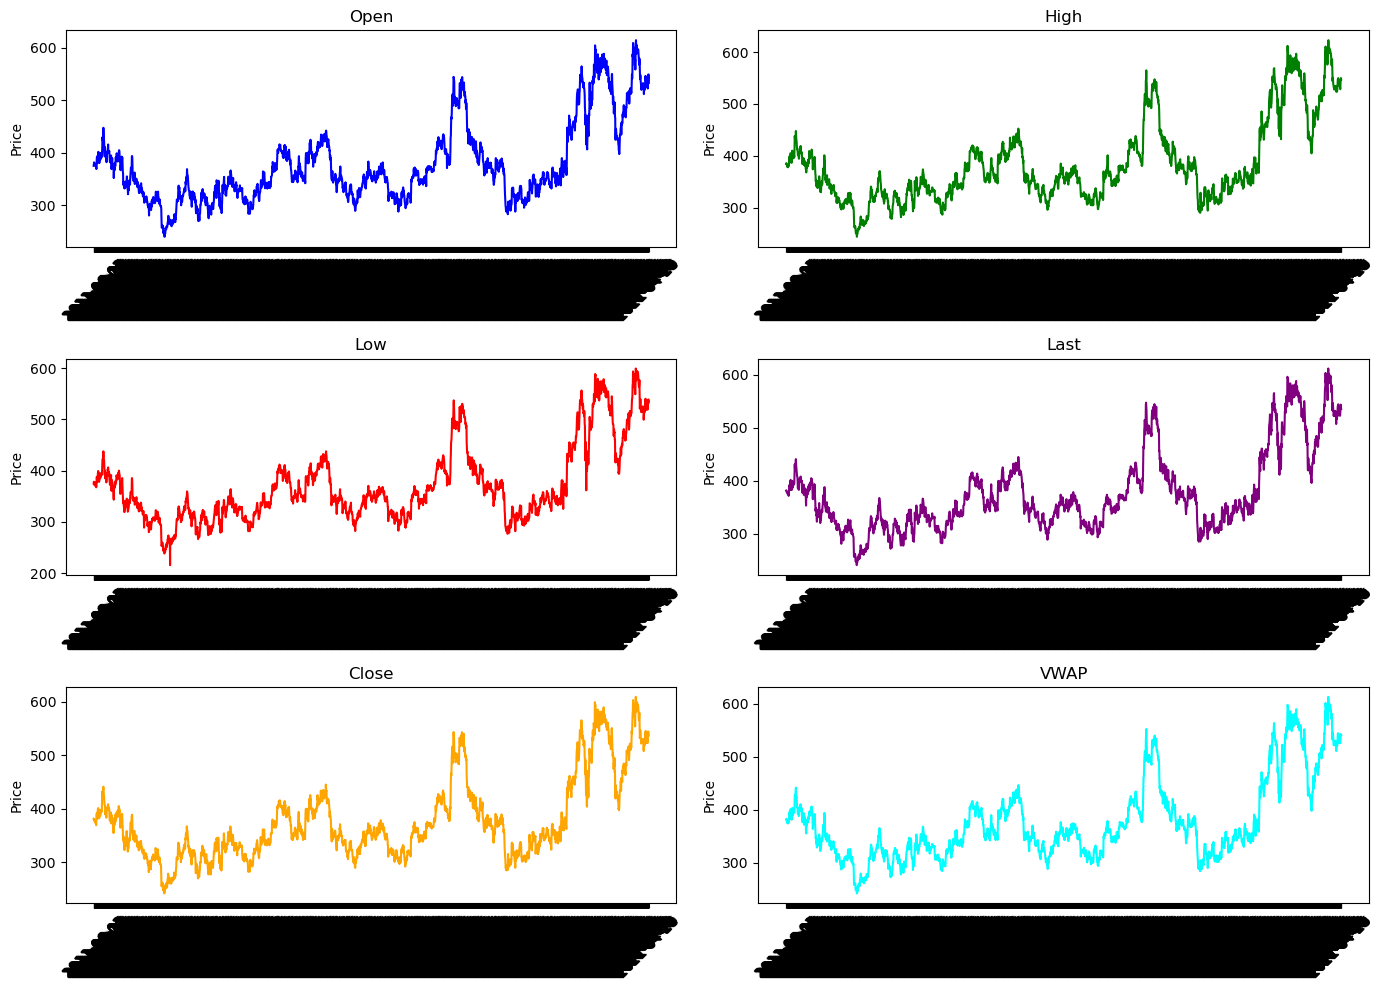

In [15]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot each variable
axes[0, 0].plot(main_dataset['Date'], main_dataset['Open'], color='blue')
axes[0, 0].set_title('Open')
axes[0, 1].plot(main_dataset['Date'], main_dataset['High'], color='green')
axes[0, 1].set_title('High')
axes[1, 0].plot(main_dataset['Date'], main_dataset['Low'], color='red')
axes[1, 0].set_title('Low')
axes[1, 1].plot(main_dataset['Date'], main_dataset['Last'], color='purple')
axes[1, 1].set_title('Last')
axes[2, 0].plot(main_dataset['Date'], main_dataset['Close'], color='orange')
axes[2, 0].set_title('Close')
axes[2, 1].plot(main_dataset['Date'], main_dataset['VWAP'], color='cyan')
axes[2, 1].set_title('VWAP')

# Add y-axis labels
for ax in axes.flat:
    ax.set_ylabel('Price')

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [17]:
dataset = main_dataset 
dataset = dataset.set_index('Date')
dataset = dataset[['Open', 'High', 'Low', 'Last', 'Close', 'VWAP']]

In [18]:
dataset['Close_MA2'] = dataset['Close'].expanding(min_periods=3).mean()  # Calculate 2-period moving average
dataset['Close_EMA'] = dataset['Close'].ewm(span=3, adjust=False).mean()  # Calculate exponential moving average
dataset = dataset.dropna(subset=['Close_MA2'])

In [19]:
dataset['Close_MA2'] = dataset['Close'].expanding(min_periods=3).mean()  # Calculate 2-period moving average

In [20]:
dataset['Close_EMA'] = dataset['Close'].ewm(span=3, adjust=False).mean() 

In [21]:
dataset = dataset.dropna(subset=['Close_MA2'])

In [22]:
dataset.head()

,Open,High,Low,Last,Close,VWAP,Close_MA2,Close_EMA
Date,,,,,,,,
2011-06-07,379.00,381.85,377.00,378.45,377.85,379.53,378.766667,378.537500
2011-06-08,378.05,379.30,371.00,377.30,377.75,375.44,378.512500,378.143750
2011-06-09,377.10,379.75,375.60,376.65,376.55,376.68,378.120000,377.346875
2011-06-10,377.50,377.90,372.25,374.80,373.95,373.89,377.425000,375.648438
2011-06-13,375.25,379.55,373.90,377.05,377.60,377.53,377.450000,376.624219


In [23]:
target = dataset[['Close']]  # Cases is the column we have to predict
del dataset['Close']


In [25]:
x, y = dataset.values, target.values

In [26]:
x.shape

(2452, 7)

In [27]:
y.shape

(2452, 1)

In [28]:
x_scaled_set = MinMaxScaler() 
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x) 
Y = y_scaled_set.fit_transform(y.reshape(-1,1)) 

In [29]:
x.shape

(2452, 7)

In [31]:
y.shape

(2452, 1)

In [54]:

X_train_data = X[:2000, :]  
y_train_data = y[:2000, :]  

X_test_data = X[2000:2452, :]   
y_test_data = y[2000:2452, :]  

In [55]:
# Reshaping the data
X_train_data = X_train_data.reshape((-1, 1, 7))  
X_test_data = X_test_data.reshape((-1, 1, 7)) 

In [56]:
print("X_train_data shape:", X_train_data.shape)
print("X_test_data shape:", X_test_data.shape)
print("y_train_data shape:", y_train_data.shape)
print("y_test_data shape:", y_test_data.shape)


X_train_data shape: (2000, 1, 7)
X_test_data shape: (452, 1, 7)
y_train_data shape: (2000, 1)
y_test_data shape: (452, 1)


In [60]:
GRU_model = Sequential()
GRU_model.add(GRU(units=512, return_sequences=True, input_shape=(1, 7)))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=256))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1, activation='sigmoid'))

In [61]:
GRU_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [62]:
GRU_model.fit(X_train_data, y_train_data, batch_size=250, epochs=100, validation_split=0.15, verbose=1)

Epoch 1/100


7/7 [==============================] - 6s 195ms/step - loss: 127811.5000 - accuracy: 0.0000e+00 - val_loss: 118164.4141 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 47ms/step - loss: 127639.4844 - accuracy: 0.0000e+00 - val_loss: 118003.8281 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 46ms/step - loss: 127534.6328 - accuracy: 0.0000e+00 - val_loss: 117968.6016 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 42ms/step - loss: 127517.1406 - accuracy: 0.0000e+00 - val_loss: 117966.1328 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 46ms/step - loss: 127515.4062 - accuracy: 0.0000e+00 - val_loss: 117965.8906 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 46ms/step - loss: 127515.1562 - accuracy: 0.0000e+00 - val_loss: 117965.8438 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] 

In [63]:
score = GRU_model.evaluate(X_test_data, y_test_data) #Evaluate model can be used to get the loss metric.
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data) #Apply the built model on test data.
y_test_pred = y_scaled_set.inverse_transform(y_pred) #Use inverse transform to undo the scaling that was done before. This gives us the original values.
y_test_actual = y_scaled_set.inverse_transform(y_test_data) # Apply the inverse transform on the actual dataset for easy comparison of predicted vs actual.

15/15 [==============================] - 0s 5ms/step - loss: 236258.5469 - accuracy: 0.0000e+00
Score: [236258.546875, 0.0]
15/15 [==============================] - 1s 5ms/step


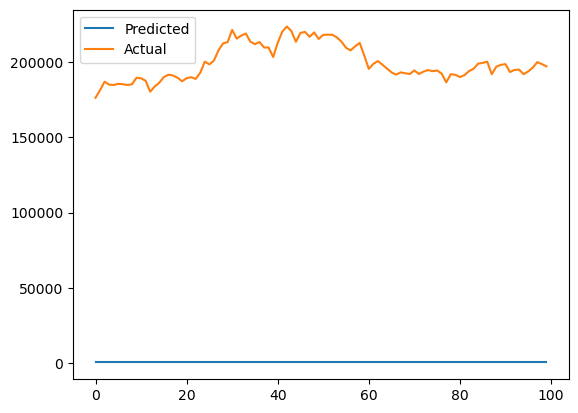

In [64]:
plt.plot(y_test_pred[-100:], label='Predicted') #Plot the predicted vs actual graph
plt.plot(y_test_actual[-100:], label='Actual')
plt.legend()
plt.show()

In [65]:
test_dates = main_dataset['Date'][2000:2452]

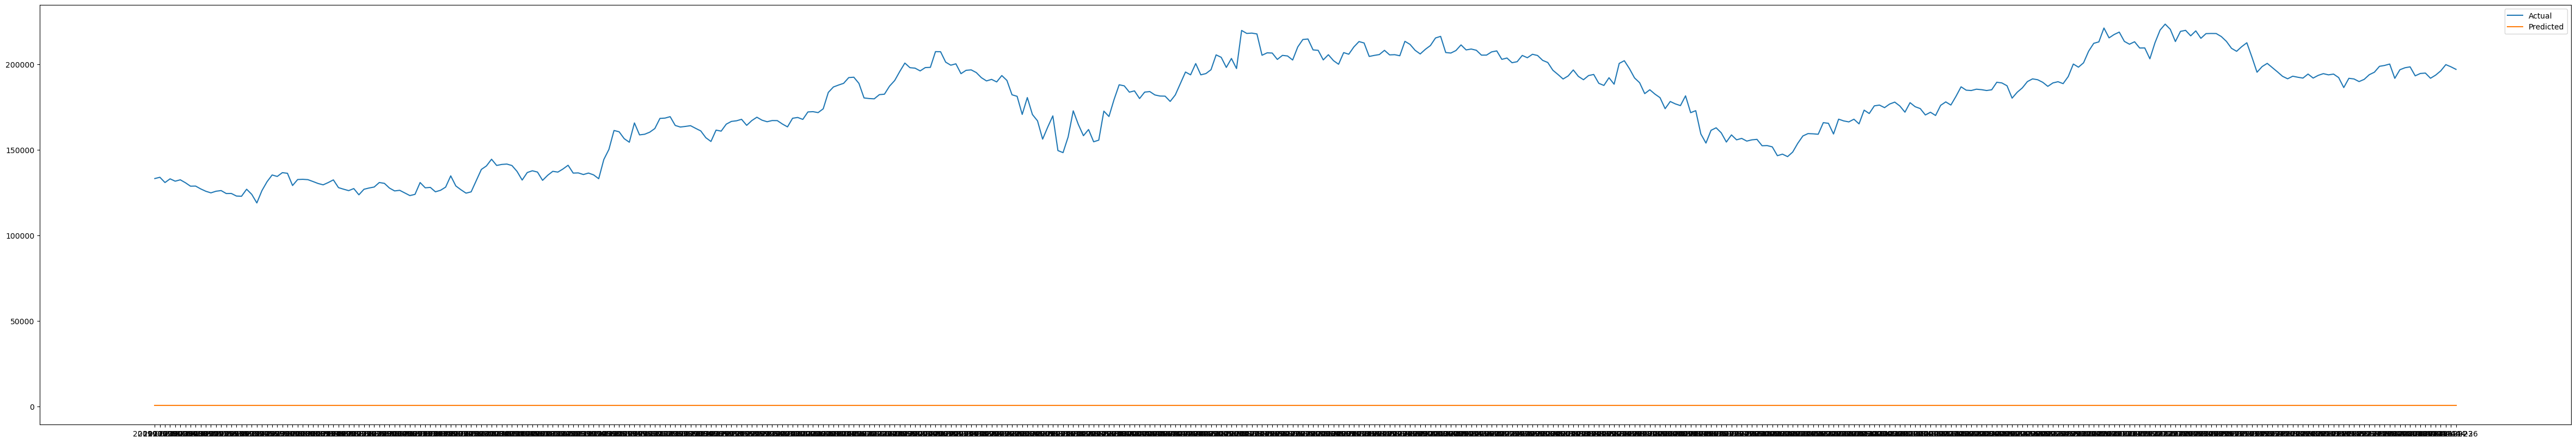

In [70]:
fig_size = (60, 10) 
plt.figure(figsize=fig_size)
plt.plot(test_dates, y_test_actual[-690:], label='Actual')
plt.plot(test_dates, y_test_pred[-690:], label='Predicted')
plt.legend()
plt.show()


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test_actual, y_test_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test_actual, y_test_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 31743440618.102093
Root Mean Squared Error: 178166.88979185245
Mean Absolute Error: 175922.30708599262
